In [1]:
import numpy as np
import pandas as pd

## PART I: GET COVID DATA

### read data

In [2]:
pre = (
    'https://raw.githubusercontent.com/'
    'CSSEGISandData/'
    'COVID-19/master/csse_covid_19_data/'
    'csse_covid_19_time_series/')

link1 = pre + 'time_series_covid19_confirmed_global.csv'
link2 = pre + 'time_series_covid19_deaths_global.csv'
link3 = pre + 'time_series_covid19_confirmed_US.csv'
link4 = pre + 'time_series_covid19_deaths_US.csv'

raw1 = pd.read_csv(link1)
raw2 = pd.read_csv(link2)
raw3 = pd.read_csv(link3)
raw4 = pd.read_csv(link4)

In [3]:
df1 = raw1.copy()
df2 = raw2.copy()
df3 = raw3.copy()
df4 = raw4.copy()

### drop columns

In [4]:
df1 = df1.drop(['Lat', 'Long'], axis=1)
df2 = df2.drop(['Lat', 'Long'], axis=1)
df3 = df3.drop(['Lat', 'Long_', 'Country_Region'], axis=1)
df4 = df4.drop(['Lat', 'Long_', 'Country_Region'], axis=1)

df3 = df3.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Combined_Key'], axis=1)
df4 = df4.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Combined_Key'], axis=1)

df4 = df4.drop(['Population'], axis=1)  # ???

### rename

In [5]:
df1 = df1.rename(columns={'Country/Region': 'name', 'Province/State': 'subname'})
df2 = df2.rename(columns={'Country/Region': 'name', 'Province/State': 'subname'})
df3 = df3.rename(columns={'Province_State': 'name', 'Admin2': 'subname'})
df4 = df4.rename(columns={'Province_State': 'name', 'Admin2': 'subname'})

### melt

In [6]:
df1 = pd.melt(df1, id_vars=['name', 'subname'], var_name='date', value_name='cases')
df2 = pd.melt(df2, id_vars=['name', 'subname'], var_name='date', value_name='deaths')
df3 = pd.melt(df3, id_vars=['name', 'subname'], var_name='date', value_name='cases')
df4 = pd.melt(df4, id_vars=['name', 'subname'], var_name='date', value_name='deaths')

### set types

In [7]:
df1['date'] = df1['date'].astype('datetime64')
df2['date'] = df2['date'].astype('datetime64')
df3['date'] = df3['date'].astype('datetime64')
df4['date'] = df4['date'].astype('datetime64')

### merge

In [8]:
df5 = df1.merge(df2, how='outer')
df6 = df3.merge(df4, how='outer')

### drop double zeros

In [9]:
logic5 = (df5['cases'] == 0) & (df5['deaths'] == 0)
logic6 = (df6['cases'] == 0) & (df6['deaths'] == 0) 

df5 = df5[~logic5]
df6 = df6[~logic6]

### reorder, sort

In [10]:
df5 = df5.iloc[:, [2, 0, 1, 3, 4]]
df6 = df6.iloc[:, [2, 0, 1, 3, 4]]

df5 = df5.sort_values(['date', 'name', 'subname'], ignore_index=True)
df6 = df6.sort_values(['date', 'name', 'subname'], ignore_index=True)

### inspect

In [11]:
display(df5)
display(df6)

,date,name,subname,cases,deaths
0,2020-01-22,China,Anhui,1,0
1,2020-01-22,China,Beijing,14,0
2,2020-01-22,China,Chongqing,6,0
3,2020-01-22,China,Fujian,1,0
4,2020-01-22,China,Guangdong,26,0
...,...,...,...,...,...
166926,2021-11-05,Vietnam,NaN,953547,22412
166927,2021-11-05,West Bank and Gaza,NaN,455099,4705
166928,2021-11-05,Yemen,NaN,9843,1905
166929,2021-11-05,Zambia,NaN,209852,3662


,date,name,subname,cases,deaths
0,2020-01-22,Ohio,Hamilton,0,1
1,2020-01-22,Washington,King,1,0
2,2020-01-23,Ohio,Hamilton,0,1
3,2020-01-23,Washington,King,1,0
4,2020-01-24,Illinois,Cook,1,0
...,...,...,...,...,...
1890158,2021-11-05,Wyoming,Sweetwater,7695,91
1890159,2021-11-05,Wyoming,Teton,5243,14
1890160,2021-11-05,Wyoming,Uinta,3901,27
1890161,2021-11-05,Wyoming,Washakie,1781,35


### save

In [12]:
df5.to_csv('covid_world.csv', index=False)
df6.to_csv('covid_us.csv', index=False)

covid_world = df5
covid_us = df6

## PART II: GET POPULATION DATA

### read data

In [13]:
link5 = (
    'https://raw.githubusercontent.com/'
    'CSSEGISandData/'
    'COVID-19/master/csse_covid_19_data/'
    'UID_ISO_FIPS_LookUp_Table.csv')

raw5 = pd.read_csv(link5)

In [14]:
df7 = raw5.copy()

### drop columns, split, drop rows

In [15]:
df7 = df7.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Lat', 'Long_', 'Combined_Key'], axis=1)

logic1 = df7['Admin2'].isna()
logic2 = df7['Province_State'].isin(['Guam', 'Northern Mariana Islands', 'Virgin Islands'])
logic3 = logic1 & ~logic2
df8 = df7[ logic3]
df9 = df7[~logic3]

df8 = df8.drop('Admin2', axis=1)
df9 = df9.drop('Country_Region', axis=1)

logic = df8['Population'].isna()
df8 = df8[~logic]

logic = df9['Population'].isna()
df9 = df9[~logic]

### rename

In [16]:
df8 = df8.rename(columns={'Province_State': 'subname', 'Country_Region': 'name', 'Population': 'pop'})
df9 = df9.rename(columns={'Admin2': 'subname', 'Province_State': 'name', 'Population': 'pop'})

### set type

In [17]:
df8['pop'] = df8['pop'].astype('int64')
df9['pop'] = df9['pop'].astype('int64')

### reorder, sort

In [18]:
df8 = df8.iloc[:, [1, 0, 2]]
df9 = df9.iloc[:, [1, 0, 2]]

df8 = df8.sort_values(['name', 'subname'], ignore_index=True)
df9 = df9.sort_values(['name', 'subname'], ignore_index=True)

### inspect

In [19]:
display(df8)
display(df9)

,name,subname,pop
0,Afghanistan,NaN,38928341
1,Albania,NaN,2877800
2,Algeria,NaN,43851043
3,Andorra,NaN,77265
4,Angola,NaN,32866268
...,...,...,...
831,West Bank and Gaza,NaN,5101416
832,Western Sahara,NaN,597330
833,Yemen,NaN,29825968
834,Zambia,NaN,18383956


,name,subname,pop
0,Alabama,Autauga,55869
1,Alabama,Baldwin,223234
2,Alabama,Barbour,24686
3,Alabama,Bibb,22394
4,Alabama,Blount,57826
...,...,...,...
3228,Wyoming,Sweetwater,42343
3229,Wyoming,Teton,23464
3230,Wyoming,Uinta,20226
3231,Wyoming,Washakie,7805


In [20]:
df8.to_csv('pop_world.csv', index=False)
df9.to_csv('pop_us.csv', index=False)

pop_world = df8
pop_us = df9

## PART III: CHECK NAME CONSISTENCY

In [21]:
set(covid_world['name']) ^ set(pop_world['name'])

{'Diamond Princess', 'MS Zaandam', 'Summer Olympics 2020', 'Western Sahara'}

In [22]:
set(covid_us['name']) ^ set(pop_us['name'])

{'American Samoa', 'Diamond Princess', 'Grand Princess'}

## PART IV: PLOT

In [23]:
from pandas.core.base import PandasObject
import matplotlib
import matplotlib.pyplot as plt

In [24]:
def get_new(df): return df.diff()
def get_smooth(df, rolling=28): return df.rolling(rolling, center=True, win_type='triang').mean()
def get_since(series, date): return series[series.index >= pd.Timestamp(date)]


PandasObject.new = get_new
PandasObject.smooth = get_smooth
PandasObject.since = get_since

In [25]:
def set_style(ax, xformat, xlocate, yformat):
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter(xformat))
    ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(xlocate))
    ax.xaxis.set_tick_params(rotation=45)

    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter(yformat))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    
line_cases =   {'color': 'blue',  'alpha': 0.25, 'linestyle': '-' }
line_deaths =  {'color': 'red',   'alpha': 0.25, 'linestyle': '-' }
line_solid =   {'color': 'black', 'alpha': 0.75, 'linestyle': '-' }
line_dashed =  {'color': 'black', 'alpha': 0.75, 'linestyle': '--'}

style1 = ('%b', np.arange(1, 13, 1), '{x:,.0f}')
style2 = ('%b', np.arange(1, 13, 3), '{x:,.0f}')

### plot countries: new cases

In [26]:
countries = pd.pivot_table(covid_world, index='date', columns='name', values=['cases', 'deaths'], aggfunc='sum')
pop = pd.pivot_table(pop_world, index='name', values='pop', aggfunc='sum')['pop']

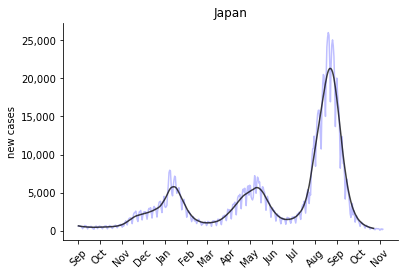

In [27]:
df1 = countries.cases.new().since('2020-9-1')
df2 = countries.cases.new().smooth().since('2020-9-1')

name = 'Japan'
s1 = df1[name]
s2 = df2[name] 

fig, ax = plt.subplots(1, 1)

ax.plot(s1, **line_cases)
ax.plot(s2, **line_solid)

ax.set_title(name)
ax.set_ylabel('new cases')
set_style(ax, *style1)

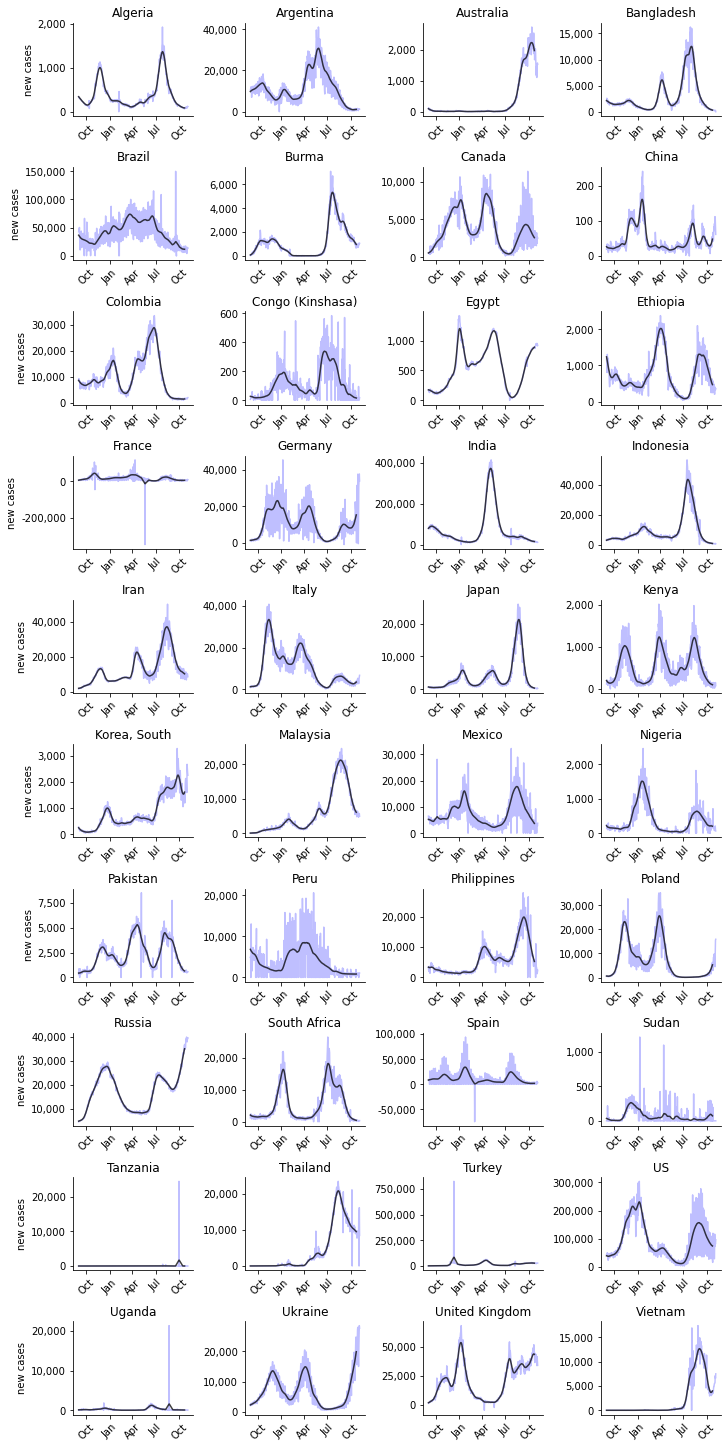

In [28]:
df1 = countries.cases.new().since('2020-9-1')
df2 = countries.cases.new().smooth().since('2020-9-1')

names = pop.nlargest(40).sort_index().index

fig, axs = plt.subplots(10, 4, figsize=(10, 20), constrained_layout=True) 

for i, ax in enumerate(axs.flatten()):
    if i < len(names):
        name = names[i]
        s1 = df1[name]
        s2 = df2[name] 

        ax.plot(s1, **line_cases)
        ax.plot(s2, **line_solid)

        ax.set_title(name)
        ax.set_ylabel('new cases')
        set_style(ax, *style2)
    else:
        ax.axis('off')
        
for ax_row in axs:
    for ax in ax_row[1:]:
        ax.set_ylabel(None)

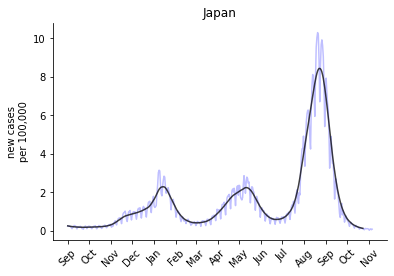

In [29]:
per = 100_000
df1 = countries.cases.new().since('2020-9-1')/pop*per
df2 = countries.cases.new().smooth().since('2020-9-1')/pop*per

name = 'Japan'
s1 = df1[name]
s2 = df2[name] 

fig, ax = plt.subplots(1, 1)

ax.plot(s1, **line_cases)
ax.plot(s2, **line_solid)

ax.set_title(name)
ax.set_ylabel(f'new cases\nper {per:,.0f}')
set_style(ax, *style1)

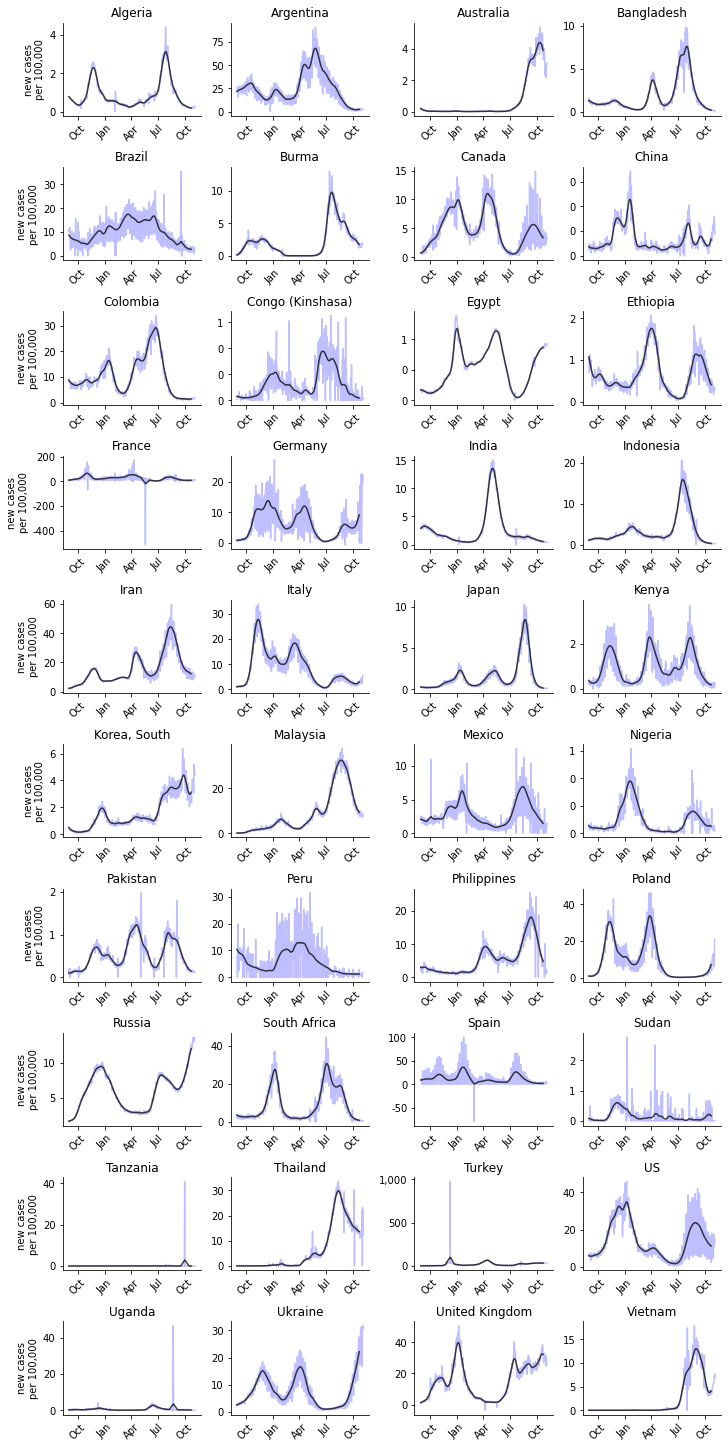

In [30]:
names = pop.nlargest(40).sort_index().index

per = 100_000
df1 = countries.cases.new().since('2020-9-1')/pop*per
df2 = countries.cases.new().smooth().since('2020-9-1')/pop*per

fig, axs = plt.subplots(10, 4, figsize=(10, 20), constrained_layout=True) 

for i, ax in enumerate(axs.flatten()):
    if i < len(names):
        name = names[i]
        s1 = df1[name]
        s2 = df2[name] 

        ax.plot(s1, **line_cases)
        ax.plot(s2, **line_solid)

        ax.set_title(name)
        ax.set_ylabel(f'new cases\nper {per:,.0f}')
        set_style(ax, *style2)
    else:
        ax.axis('off')
        
for ax_row in axs:
    for ax in ax_row[1:]:
        ax.set_ylabel(None)

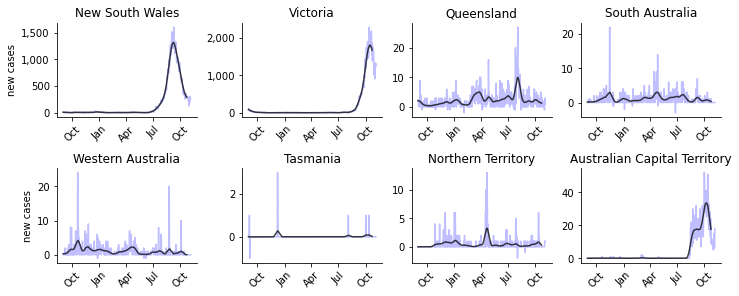

In [31]:
country = pd.pivot(covid_world, index='date', columns=['name', 'subname'])

name = 'Australia'

df1 = country.cases[name].new().since('2020-9-1')
df2 = country.cases[name].new().smooth().since('2020-9-1')

names = df1.columns

fig, axs = plt.subplots(2, 4, figsize=(10, 4), constrained_layout=True) 

for i, ax in enumerate(axs.flatten()):
    if i < len(names):
        name = names[i]
        s1 = df1[name]
        s2 = df2[name] 

        ax.plot(s1, **line_cases)
        ax.plot(s2, **line_solid)

        ax.set_title(name)
        ax.set_ylabel('new cases')
        set_style(ax, *style2)
    else:
        ax.axis('off')
        
for ax_row in axs:
    for ax in ax_row[1:]:
        ax.set_ylabel(None)

### plot states: new cases

In [32]:
states = pd.pivot_table(covid_us, index='date', columns='name', values=['cases', 'deaths'], aggfunc='sum')
pop = pd.pivot_table(pop_us, index='name', values='pop', aggfunc='sum')['pop']

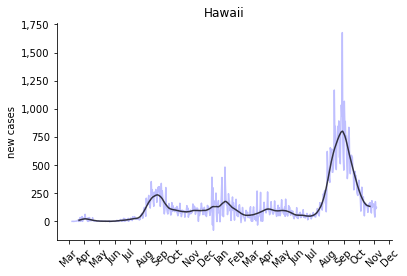

In [38]:
df1 = states.cases.new().since('2019-9-1')
df2 = states.cases.new().smooth().since('2019-9-1')

name = 'Hawaii'
s1 = df1[name]
s2 = df2[name] 

fig, ax = plt.subplots(1, 1)

ax.plot(s1, **line_cases)
ax.plot(s2, **line_solid)

ax.set_title(name)
ax.set_ylabel('new cases')
set_style(ax, *style1)

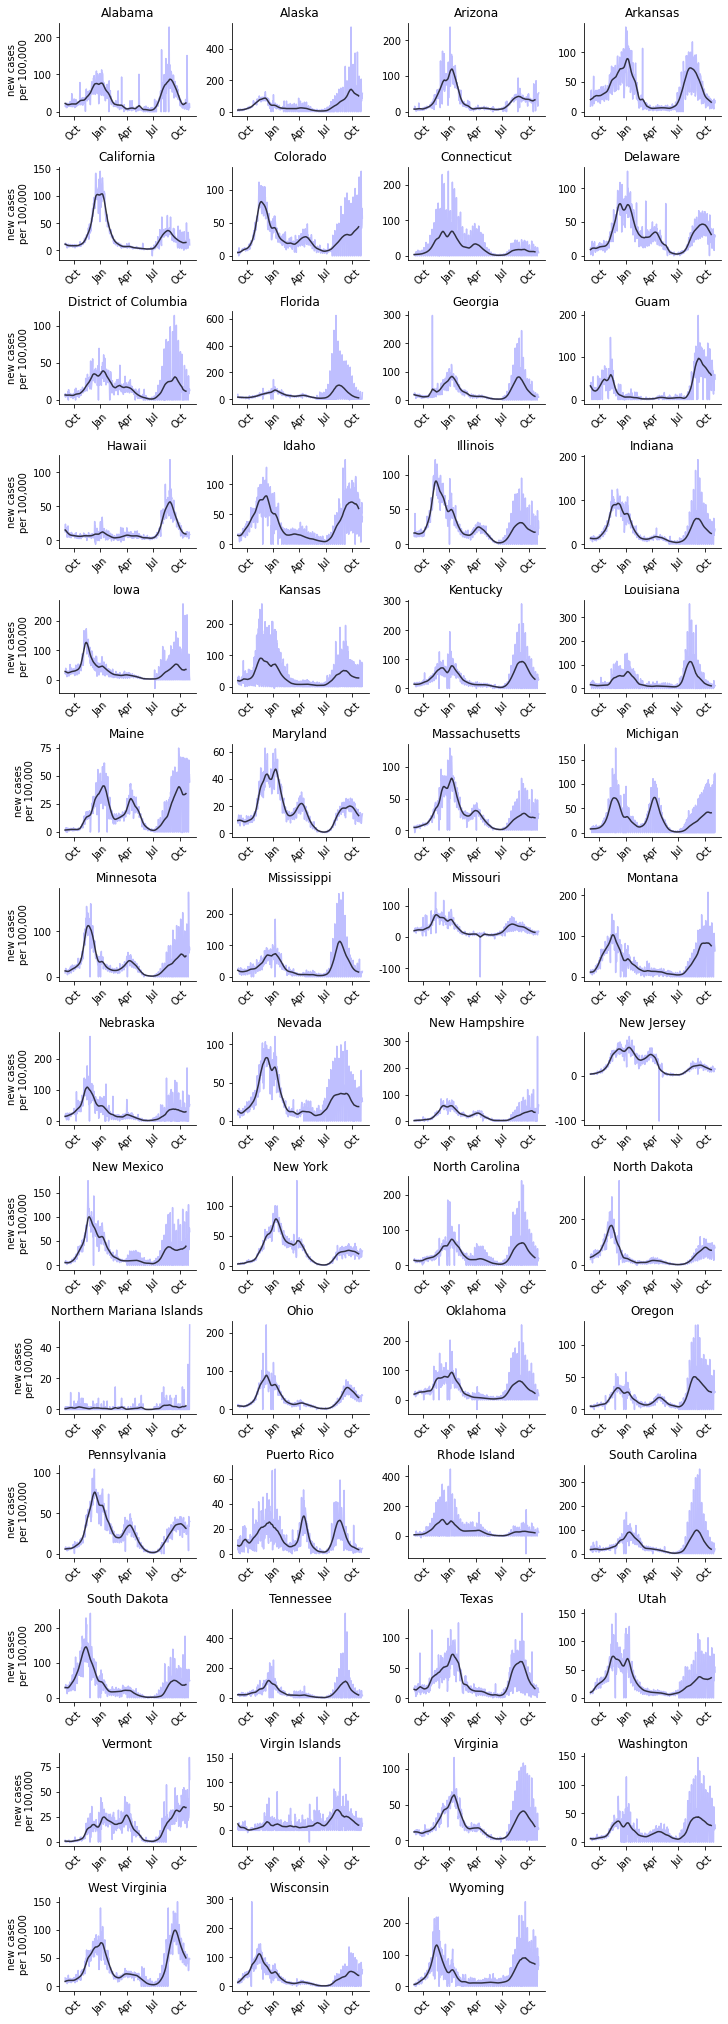

In [37]:
names = set(df1.columns) and set(pop.index)
names = np.sort(list(names))

per = 100_000
df1 = states.cases.new().since('2020-9-1')[names]/pop*per
df2 = states.cases.new().smooth().since('2020-9-1')[names]/pop*per

fig, axs = plt.subplots(14, 4, figsize=(10, 28), constrained_layout=True) 

for i, ax in enumerate(axs.flatten()):
    if i < len(names):
        name = names[i]
        s1 = df1[name]
        s2 = df2[name] 

        ax.plot(s1, **line_cases)
        ax.plot(s2, **line_solid)

        ax.set_title(name)
        ax.set_ylabel(f'new cases\nper {per:,.0f}')
        set_style(ax, *style2)
    else:
        ax.axis('off')
        
for ax_row in axs:
    for ax in ax_row[1:]:
        ax.set_ylabel(None)

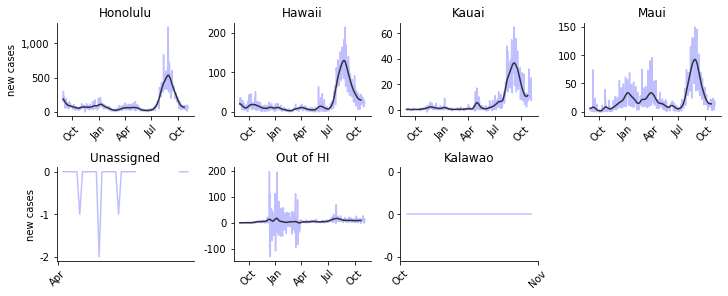

In [35]:
state = pd.pivot(covid_us, index='date', columns=['name', 'subname'])

name = 'Hawaii'

df1 = state.cases[name].new().since('2020-9-1')
df2 = state.cases[name].new().smooth().since('2020-9-1')

names = df1.columns

fig, axs = plt.subplots(2, 4, figsize=(10, 4), constrained_layout=True) 

for i, ax in enumerate(axs.flatten()):
    if i < len(names):
        name = names[i]
        s1 = df1[name]
        s2 = df2[name] 

        ax.plot(s1, **line_cases)
        ax.plot(s2, **line_solid)

        ax.set_title(name)
        ax.set_ylabel('new cases')
        set_style(ax, *style2)
    else:
        ax.axis('off')
        
for ax_row in axs:
    for ax in ax_row[1:]:
        ax.set_ylabel(None)

In [36]:
df1

subname,Honolulu,Hawaii,Kauai,Maui,Unassigned,Out of HI,Kalawao
date,,,,,,,
2020-09-01,157.0,19.0,0.0,5.0,NaN,0.0,NaN
2020-09-02,301.0,35.0,0.0,2.0,NaN,0.0,NaN
2020-09-03,190.0,17.0,0.0,4.0,NaN,0.0,NaN
2020-09-04,236.0,34.0,0.0,1.0,NaN,0.0,NaN
2020-09-05,190.0,24.0,0.0,5.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...
2021-11-01,34.0,12.0,9.0,9.0,NaN,5.0,NaN
2021-11-02,14.0,13.0,9.0,3.0,NaN,-1.0,NaN
2021-11-03,102.0,21.0,25.0,13.0,NaN,15.0,NaN
